In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
tran = pd.read_csv('D:/transaction_data.csv')

In [3]:
tran.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [4]:
tran.dtypes

date           object
name           object
transaction    object
dtype: object

In [5]:
#tran['date'] = pd.to_datetime(tran['date'])

In [6]:
tran.shape

(5315, 3)

In [7]:
tran.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [8]:
tran.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [9]:
tran.drop_duplicates()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [10]:
#Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому
#или иному уровню? Визуализируйте результат с помощью барплота.

In [11]:
t = tran.transaction.value_counts()

In [12]:
t

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

C:\Users\Zhire\AppData\Local\Temp\ipykernel_8100\3533242410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(tran.transaction.value_counts(),palette='pastel')


<Axes: ylabel='transaction'>

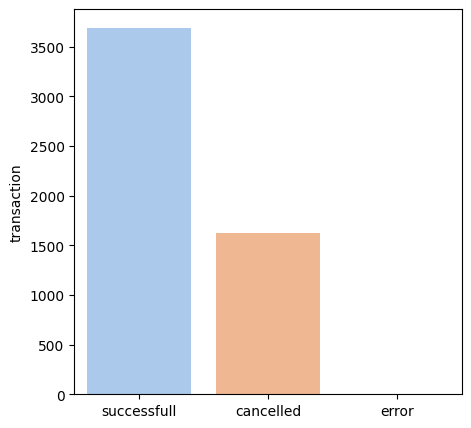

In [13]:
plt.figure(figsize=(5, 5))
sns.barplot(tran.transaction.value_counts(),palette='pastel')

In [14]:
#Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму 
#распределения числа успешных транзакций.

In [15]:
successful_tran_clients = tran.query('transaction == "successfull"').groupby('name').agg({'date':'count'})

<Figure size 1000x500 with 0 Axes>

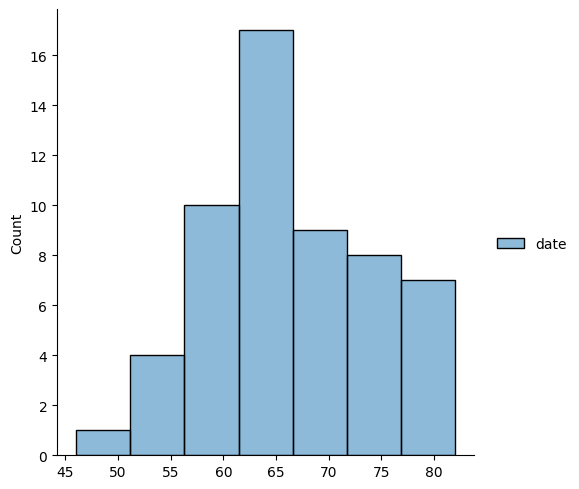

In [16]:
plt.figure(figsize=(10, 5))
sns.displot(successful_tran_clients)

In [17]:
successful_tran_clients.describe()

,date
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [18]:
#Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)
#Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы
# имена пользователей, строк – минуты, значений – число совершенных операций 
#в указанную минуту. Пропущенные значения заполните нулями.


In [19]:
tr = pd.read_csv('D:/transaction_data_updated.csv')

In [20]:
tr.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [21]:
tr1 = tr.groupby(['minute','name'],as_index=False).agg({'transaction':'count'})

In [22]:
user_vs_minute_pivot = tr1.pivot(index='minute', columns='name', values='transaction')#.reset_index()

In [23]:
user_vs_minute_pivot.fillna(0,inplace =True)

In [24]:
user_vs_minute_pivot.reset_index()

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0
9,9,2.0,4.0,2.0,3.0,4.0,0.0,3.0,2.0,2.0,...,2.0,3.0,1.0,2.0,4.0,2.0,3.0,0.0,1.0,4.0


<Axes: xlabel='minute'>

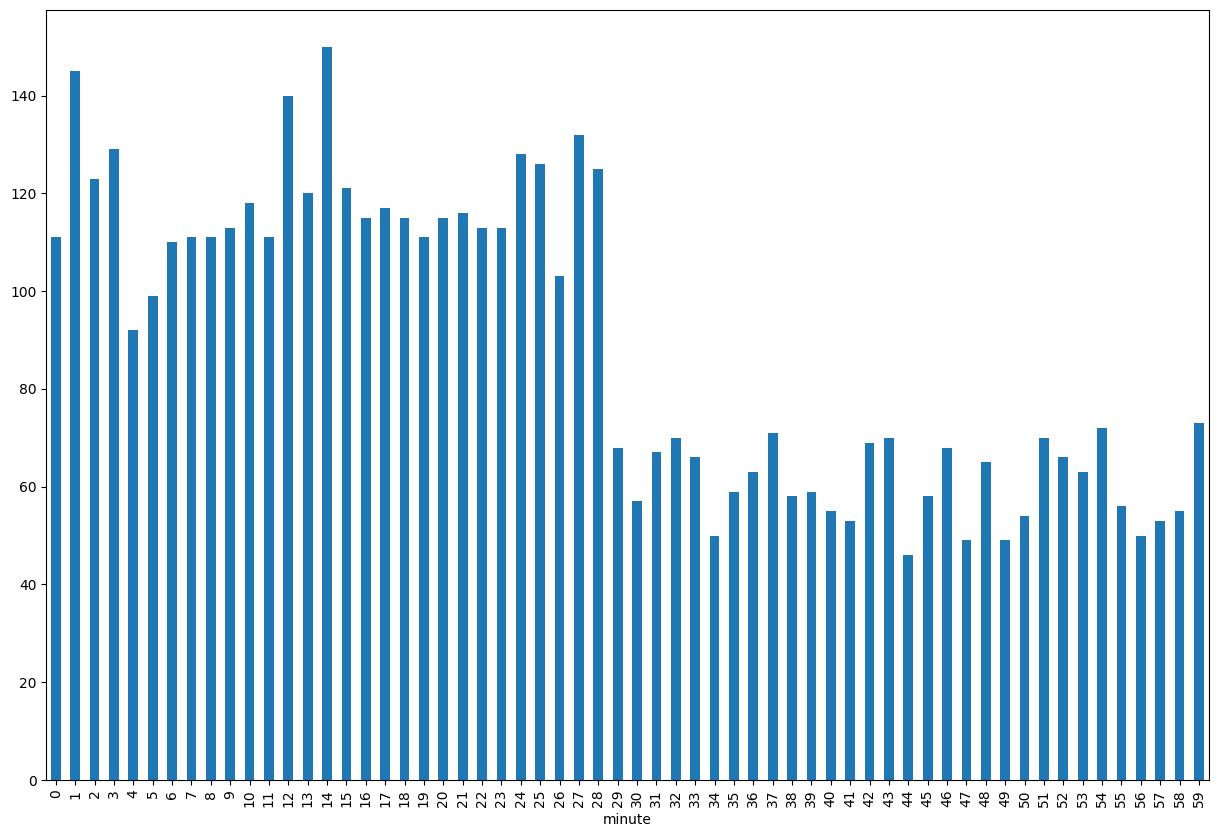

In [31]:
user_vs_minute_pivot.sum(axis=1).plot.bar(figsize=(15,10))

In [32]:
tr['date'] = pd.to_datetime(tr['date'])

In [34]:
tr.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [35]:
tr['true_minute'] = tr.date.dt.minute + tr.date.dt.hour*60

<Axes: ylabel='count'>

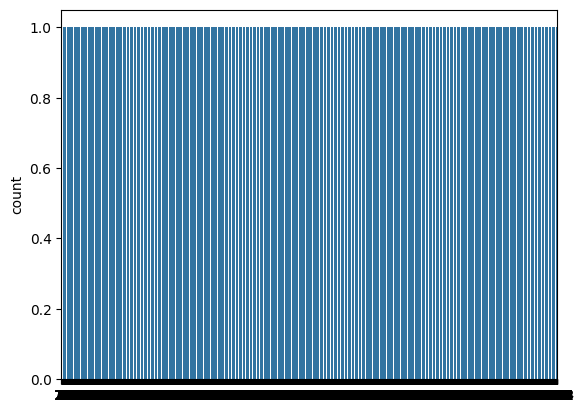

In [40]:
sns.countplot(tr['true_minute'])

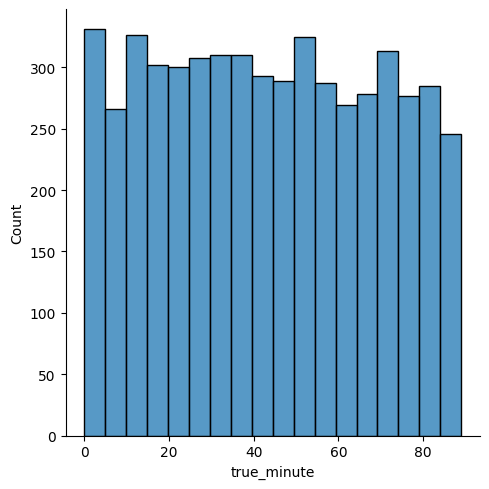

In [41]:
sns.displot(tr['true_minute'])

In [ ]:
sns.hisplot(tr['true_minute'])